# Dosa / No Dosa - MLP & CNN

## Frame the Problem

We want to classify the images in two categories - **Dosa** and **No-Dosa**. This is a classical two-class image classification problem.
- Dosa
- No-Dosa

## Acquire the Data

These images very downloaded google.com/images with "reuse with modification" filter to allow for commercial reuse.

In [8]:
#!mkdir data
#!wget https://bit.do/dosa-nodosa -O data/food-binary.zip
#!cd data && unzip food-binary.zip

### Load basic libraries

In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import vis

Using TensorFlow backend.


## Refine the Data 

This is the pre-processing step to see the images.
- Normalize the images
- Standardize to singular size

** Let us see one image from the dataset **

In [2]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator

In [3]:
img = load_img('data/food-binary/Dosa/img39.jpeg')

In [4]:
# Read as matrix and see shape
image = img_to_array(img)
image.shape

(194, 259, 3)

### Normalize the image by rescaling to 0 - 1

In [5]:
image = image / 255

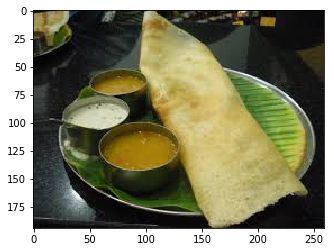

In [8]:
# View the image
plt.imshow(image);

### Standardize to one size

In [9]:
import PIL

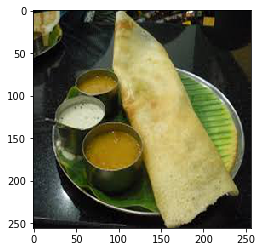

In [10]:
img = img.resize((256,256), PIL.Image.LANCZOS)
plt.imshow(img);

#### See images from the first batch

In [11]:
gen = ImageDataGenerator(rescale=1/255)

In [12]:
view = gen.flow_from_directory(directory="data/food-binary", target_size=(256,256), 
                               class_mode="categorical", batch_size=10)

Found 325 images belonging to 2 classes.


In [13]:
images = view.next()

In [14]:
import importlib
importlib.reload(vis)

<module 'vis' from '/volumes/notebooks/deep-learning/vis.py'>

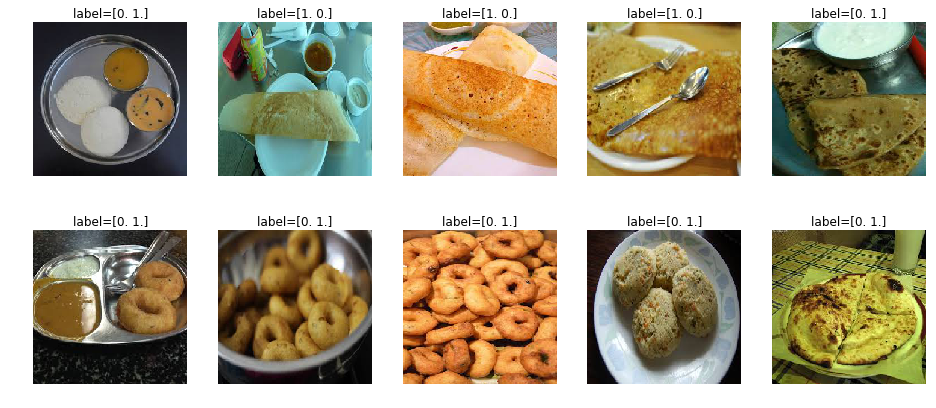

In [15]:
vis.show_images(images[0], images[1])

## Model: Multi-Layer Perceptron

**Step 1: Prepare the images and labels**

Split data into train & validation and normalise the data to (0,1) 

In [16]:
data = ImageDataGenerator(validation_split=0.2, rescale=1/255)

In [17]:
train_generator = data.flow_from_directory(directory="data/food-binary/", 
                                           target_size=(256,256),
                                           class_mode="categorical", 
                                           shuffle=True, 
                                           batch_size=8, 
                                           subset='training')

Found 260 images belonging to 2 classes.


In [18]:
val_generator = data.flow_from_directory(directory="data/food-binary/", 
                                           target_size=(256,256),
                                           class_mode="categorical", 
                                           shuffle=True, 
                                           batch_size=8, 
                                           subset='validation')

Found 65 images belonging to 2 classes.


**Step 2: Craft the feature transfomation and classifier model **

In [19]:
from keras import Sequential
from keras.layers import Dense, Activation, Flatten

In [21]:
mlp = Sequential()
mlp.add(Dense(units=8, activation='relu', input_shape=(256, 256, 3)))
mlp.add(Flatten())
mlp.add(Dense(units=2, activation='sigmoid'))

In [22]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256, 256, 8)       32        
_________________________________________________________________
flatten_2 (Flatten)          (None, 524288)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 1048578   
Total params: 1,048,610
Trainable params: 1,048,610
Non-trainable params: 0
_________________________________________________________________


**Step 3: Compile and fit the model**

In [23]:
mlp.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [24]:
mlp_output =  mlp.fit_generator(
    train_generator,
    #steps_per_epoch=2000 // batch_size,
    epochs=10,
    validation_data=val_generator,
    verbose = 2
    #validation_steps=800 // batch_size
)

**Step 4: Check the performance of the model**

In [25]:
mlp_metrics = mlp_output.history

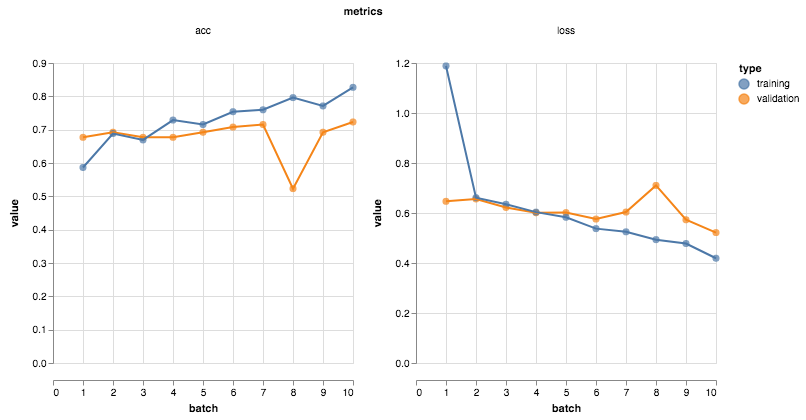

In [26]:
vis.metrics(mlp_metrics)

## Model: Convolution Neural Network

In [27]:
from keras.layers import Conv2D, MaxPooling2D, Dropout

In [28]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation='sigmoid'))

In [29]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
__________

In [30]:
cnn.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [31]:
cnn_output =  cnn.fit_generator(train_generator, epochs=10, validation_data=val_generator, verbose = 2)

Epoch 1/10
 - 3s - loss: 0.6421 - acc: 0.6798 - val_loss: 0.6319 - val_acc: 0.6769
Epoch 2/10
 - 2s - loss: 0.6470 - acc: 0.6743 - val_loss: 0.6358 - val_acc: 0.6769
Epoch 3/10
 - 2s - loss: 0.6361 - acc: 0.6780 - val_loss: 0.6348 - val_acc: 0.6769
Epoch 4/10
 - 2s - loss: 0.6305 - acc: 0.6780 - val_loss: 0.6335 - val_acc: 0.6769
Epoch 5/10
 - 2s - loss: 0.6358 - acc: 0.6743 - val_loss: 0.6345 - val_acc: 0.6769
Epoch 6/10
 - 2s - loss: 0.6329 - acc: 0.6780 - val_loss: 0.6331 - val_acc: 0.6769
Epoch 7/10
 - 2s - loss: 0.6361 - acc: 0.6817 - val_loss: 0.6335 - val_acc: 0.6769
Epoch 8/10
 - 2s - loss: 0.6218 - acc: 0.6817 - val_loss: 0.6312 - val_acc: 0.6769
Epoch 9/10
 - 2s - loss: 0.6282 - acc: 0.6798 - val_loss: 0.6317 - val_acc: 0.6769
Epoch 10/10
 - 2s - loss: 0.6222 - acc: 0.6798 - val_loss: 0.6403 - val_acc: 0.6769


In [32]:
cnn_metrics = cnn_output.history

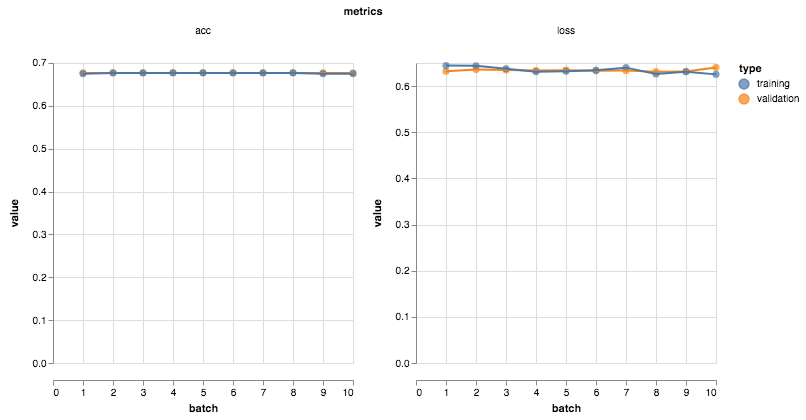

In [33]:
vis.metrics(cnn_metrics)